In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pickle 

In [2]:
# LOADING THE DATASET
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.reset_index(inplace=True, drop= True)

# EXPLORATORY DATA ANALYSIS:

In [9]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

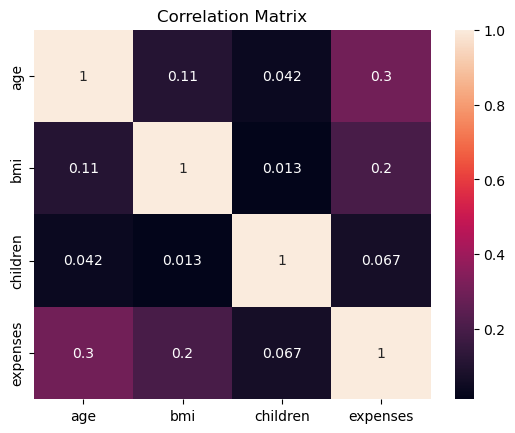

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

In [12]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [14]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

# Plots for numerical columns

<Axes: xlabel='age', ylabel='Density'>

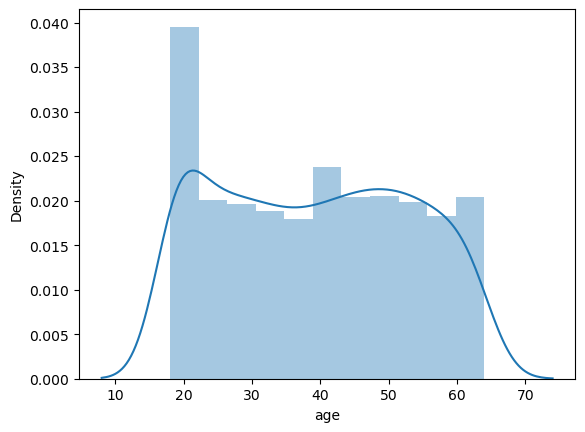

In [15]:
sns.distplot(df['age'])

<Axes: xlabel='bmi', ylabel='Density'>

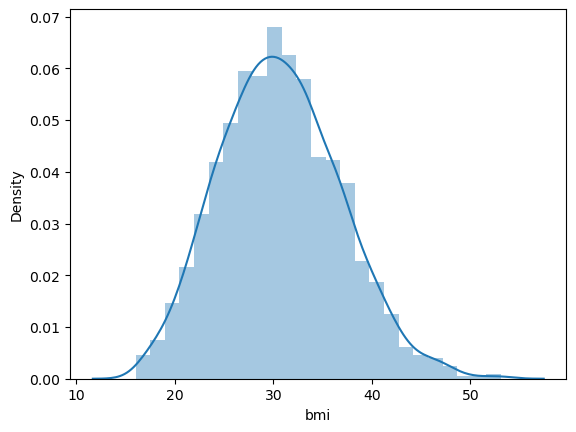

In [16]:
sns.distplot(df['bmi'])

<Axes: xlabel='children', ylabel='Count'>

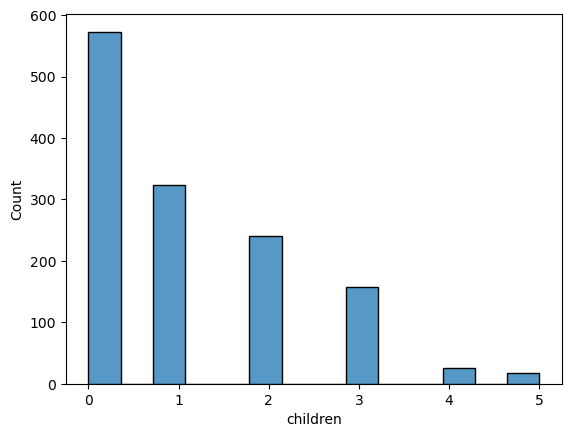

In [17]:
sns.histplot(df['children'])

# Plots for categorical columns

<Axes: xlabel='sex', ylabel='count'>

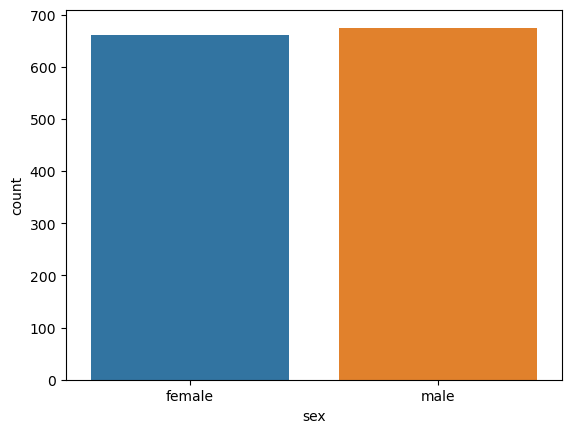

In [18]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

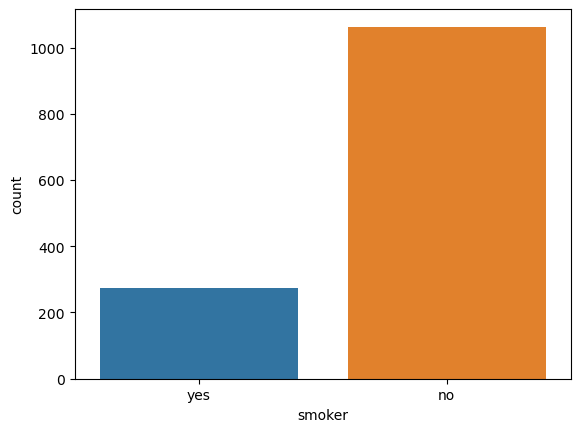

In [19]:
sns.countplot(x=df['smoker'])

<Axes: xlabel='region', ylabel='count'>

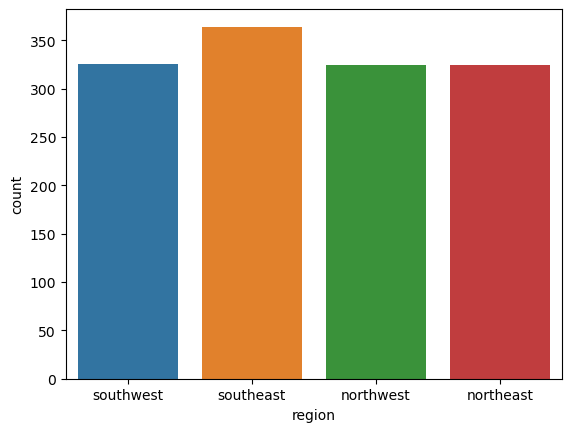

In [20]:
sns.countplot(x=df['region'])

<Axes: xlabel='age', ylabel='expenses'>

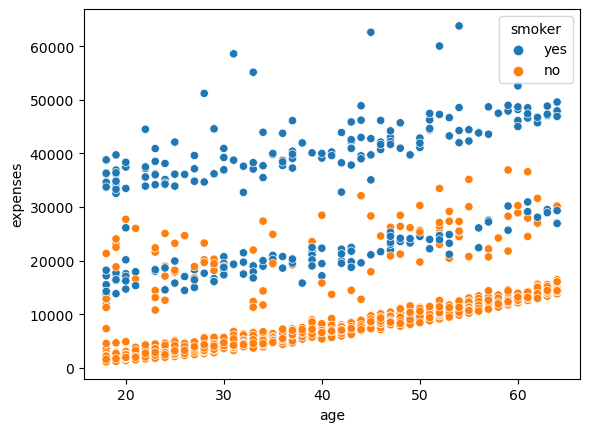

In [21]:
sns.scatterplot(x=df['age'], y=df['expenses'], hue=df['smoker'])

<Axes: xlabel='bmi', ylabel='expenses'>

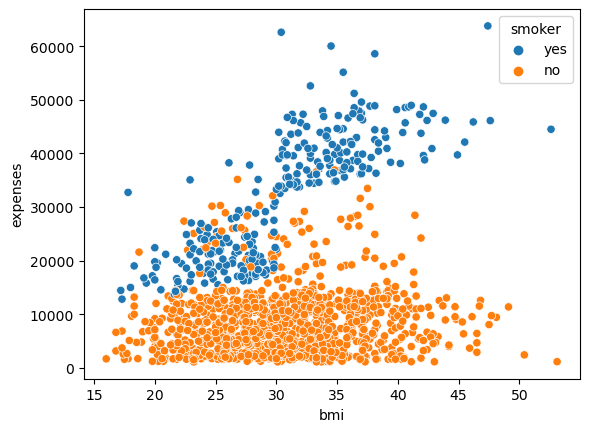

In [22]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue=df['smoker'])

# Feature Engineering

In [23]:
# One Hot Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

In [24]:
encoded_array = encoder.fit_transform(df[["sex","smoker","region"]])

In [25]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
encoded_categories = encoder.categories_
encoded_categories_array = np.array(encoded_categories).flatten()

In [27]:
ohe_df = pd.DataFrame(encoded_array,columns=["male","yes","northwest","southeast","southwest"])
ohe_df

,male,yes,northwest,southeast,southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1332,1.0,0.0,1.0,0.0,0.0
1333,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,0.0,1.0


In [28]:
df_final = pd.concat([df,ohe_df],axis=1)
df_final

,age,sex,bmi,children,smoker,region,expenses,male,yes,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0.0,1.0,0.0,0.0,1.0
1,18,male,33.8,1,no,southeast,1725.55,1.0,0.0,0.0,1.0,0.0
2,28,male,33.0,3,no,southeast,4449.46,1.0,0.0,0.0,1.0,0.0
3,33,male,22.7,0,no,northwest,21984.47,1.0,0.0,1.0,0.0,0.0
4,32,male,28.9,0,no,northwest,3866.86,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,male,31.0,3,no,northwest,10600.55,1.0,0.0,1.0,0.0,0.0
1333,18,female,31.9,0,no,northeast,2205.98,0.0,0.0,0.0,0.0,0.0
1334,18,female,36.9,0,no,southeast,1629.83,0.0,0.0,0.0,1.0,0.0
1335,21,female,25.8,0,no,southwest,2007.95,0.0,0.0,0.0,0.0,1.0


In [29]:
df_final.drop(["smoker","region","sex"],axis=1,inplace=True)

In [30]:
#renaming the columns
df_final= df_final.rename(columns={'yes': 'smoker','male':'sex'})
df_final

,age,bmi,children,expenses,sex,smoker,northwest,southeast,southwest
0,19,27.9,0,16884.92,0.0,1.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,1.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,1.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,1.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,50,31.0,3,10600.55,1.0,0.0,1.0,0.0,0.0
1333,18,31.9,0,2205.98,0.0,0.0,0.0,0.0,0.0
1334,18,36.9,0,1629.83,0.0,0.0,0.0,1.0,0.0
1335,21,25.8,0,2007.95,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Correlation Matrix')

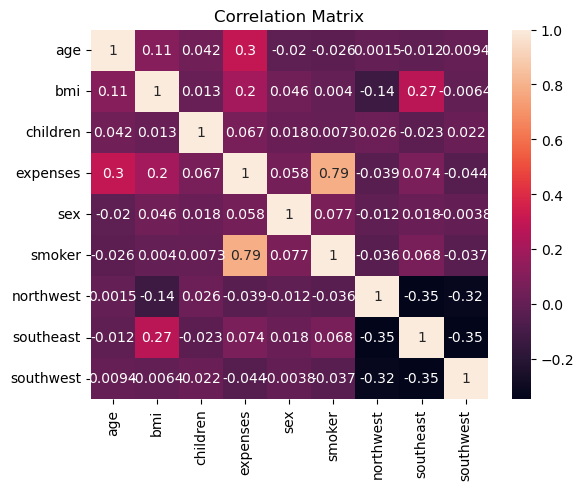

In [31]:
sns.heatmap(df_final.corr(), annot=True)
plt.title('Correlation Matrix')

# Splitting the data

In [32]:
X = df_final.drop(['sex','children',"northwest","southeast","southwest",'expenses'], axis=1)
y = df_final['expenses']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# Standardizing the input variables(X)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [36]:
# Model training and Evaluation

In [37]:
# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
score1 = r2_score(y_test, y_pred1)
s1 = mean_squared_error(y_test,y_pred1,squared=False)


In [38]:
# DECISION TREE
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)
score2 = r2_score(y_test, y_pred2)
s2 = mean_squared_error(y_test,y_pred2,squared=False)


In [39]:
# GRADIENT BOOSTING
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3 = gb.predict(X_test)
score3 = r2_score(y_test, y_pred3)
s3 = mean_squared_error(y_test,y_pred3,squared=False)


In [40]:
# RANDOM FOREST
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
score4 = r2_score(y_test, y_pred4)
s4 = mean_squared_error(y_test,y_pred4,squared=False)


In [41]:
# XGBOOST
xgb = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
xgb.fit(X_train, y_train)
y_pred5 = xgb.predict(X_test)
score5 = r2_score(y_test, y_pred5)
s5 = mean_squared_error(y_test,y_pred5,squared=False)


In [42]:
models = [LinearRegression(),DecisionTreeRegressor(), GradientBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]
r2_scores = [score1, score2, score3, score4, score5]
rmse = [s1,s2,s3,s4,s5]

df1 = pd.DataFrame({'Model':models, 'R2_score':r2_scores, 'RMSE':rmse})

In [43]:
df1

,Model,R2_score,RMSE
0,LinearRegression(),0.804938,5986.964514
1,DecisionTreeRegressor(),0.778153,6384.810824
2,GradientBoostingRegressor(),0.900244,4281.435829
3,RandomForestRegressor(),0.874119,4809.506628
4,"XGBRegressor(base_score=None, booster=None, ca...",0.891845,4458.034766


In [44]:
# AFTER GRID SEARCH CV
gb_final = GradientBoostingRegressor(max_depth=3, max_features='auto',n_estimators=80,min_samples_split=2)
gb_final.fit(X_train,y_train)
y_pred3 = gb_final.predict(X_test)
score_new = r2_score(y_test, y_pred3)
s_new = mean_squared_error(y_test,y_pred3,squared=False)


In [45]:
#prediction on training data
y_pred3_train = gb.predict(X_train)
score3_train = r2_score(y_train, y_pred3_train)
s3_train = mean_squared_error(y_train,y_pred3_train,squared=False)
print(f'R2 of training data= {score3_train}')
print(f'RMSE of training data= {s3_train}')

R2 of training data= 0.8783327134667044
RMSE of training data= 4081.42576381743


In [46]:
print(f'R2 score before applying GridSearchCV= {score3}')
print(f'RMSE before applying GridSearchCV= {s3}')

R2 score before applying GridSearchCV= 0.9002444223725591
RMSE before applying GridSearchCV= 4281.435828765662


In [47]:
print(f'R2 score after applying GridSearchCV= {score_new}')
print(f'RMSE after applying GridSearchCV= {s_new}')

R2 score after applying GridSearchCV= 0.9005047106704872
RMSE after applying GridSearchCV= 4275.846489472499


# Pickling the model file for deployment

In [48]:
pickle.dump(gb_final,open('gradient_boosting_model.pkl','wb'))

In [49]:
# pickled_model= pickle.load(open('gradient_boosting_model.pkl','rb'))